# topics:
- [cv2.morphologyEx](#cv2.morphologyEx)
  
    - [Morphological Transformations docs](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)
 - [huang transform]


----
slide 4


In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

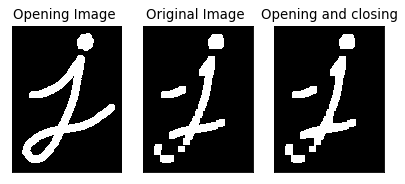

In [7]:
img = cv2.imread('session_9/j.png',0)
kernel = np.ones((7,7),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing     = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)


figure(figsize=(6, 6), dpi=80)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title(f'Opening Image '), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(opening,cmap = 'gray')
plt.title(f'Original Image '), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(closing,cmap = 'gray')
plt.title('Opening and closing'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
import cv2
import numpy as np


cap = cv2.VideoCapture(2)

# initialize a black canvas
screen = np.zeros((600, 1000))


# use this to capture a histogram
while True:
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.resize(frame, (1000, 600))

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, 'Place region of interest inside box & press `A`',(5, 50), font, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.rectangle(frame, (500, 100), (700, 300), (105, 105, 105), 2)
    box = frame[105:175, 505:575]

    cv2.imshow("Capture Histogram", frame)
    key = cv2.waitKey(10)
    if key == ord('a'):
        object_color = box
        cv2.destroyAllWindows()
        break
    if key == ord('q'):
        cv2.destroyAllWindows()
        cap.release()
        break

object_color_hsv = cv2.cvtColor(object_color, cv2.COLOR_BGR2HSV)
object_hist      = cv2.calcHist([object_color_hsv], [0, 1], None,[180, 256], [0, 180, 0, 256])

cv2.normalize(object_hist, object_hist, 0, 255, cv2.NORM_MINMAX)


# detect histogram
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # flip and resize the image.
    frame = cv2.flip(frame, 1)
    # Use a resolution best suited for your camera.
    frame = cv2.resize(frame, (1000, 600))

    

    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # apply back projection to image using object_hist as
    # the model histogram
    object_segment = cv2.calcBackProject([hsv_frame], [0, 1], object_hist, [0, 180, 0, 256], 1)
    cv2.imshow("", object_segment)
    _, segment_thresh = cv2.threshold(object_segment, 20, 255, cv2.THRESH_BINARY)
    

    # apply some image operations to enhance image
    kernel = None
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    filtered = cv2.filter2D(segment_thresh, -1, disc)

    eroded = cv2.erode(filtered, kernel, iterations=2)
    dilated = cv2.dilate(eroded, kernel, iterations=2)
    closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)
    cv2.imshow("closing", closing)

    # masking
    masked = cv2.bitwise_and(frame, frame, mask=closing)

    cv2.imshow("Hand Detector", frame)

    k = cv2.waitKey(5)
    if k == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()